In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import chi2

In [2]:
# Matplotlib customize
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.borderpad'] = 0.6
plt.rcParams['legend.framealpha'] = 0.7

In [3]:
#plt.rcParams.keys()

In [4]:
# Background points
N = 11
b = np.linspace(0,10,N)
# Signal 
s = 1

In [5]:
def GetLimit(n,b,s,CL=0.95):
    
    df = 2*(n+1)
    upper = (0.5*chi2.ppf(CL,df=df) - b)/s
    return upper

In [6]:
def GetMu(n):
    
    mu = np.zeros(N)
    
    for i in range(N):
        mu[i] = GetLimit(n,b[i],s)
        
    return mu

In [7]:
Points = {}

for i in range(N):
    Points[i] = GetMu(i)

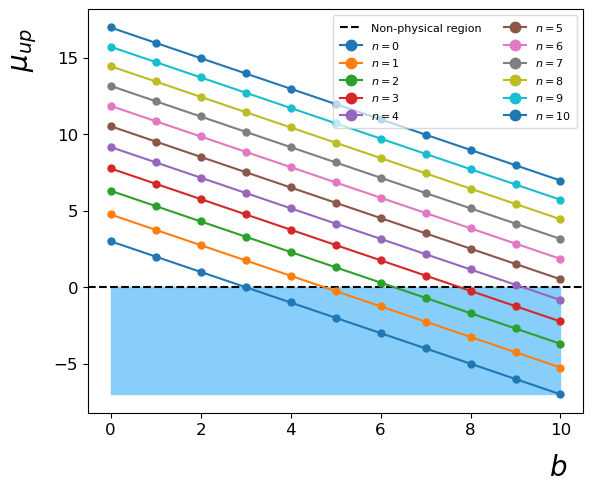

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.axhline(y = 0, color='k', ls='--' ,label='Non-physical region')
ax.fill_between( b, -7, color='lightskyblue' )

for i in range(len(Points)):
    ax.plot(b,Points[i],marker='o',label=r'$n= %.0f$'%(i))
    
    
ax.set_xlabel(r'$b$')
ax.xaxis.set_label_coords(0.95,-0.1)
#ax.set_xlim(x[0],x[-1])

# Label Y
ax.set_ylabel(r'$\mu_{up}$')
ax.yaxis.set_label_coords(-0.1,0.90)
#ax.set_ylim(np.min(y),np.max(y))

# Tickers
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajustar los márgenes automáticamente
plt.tight_layout()

#Legend
ax.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=2,title='')

# Saving figure
plt.savefig('FrequentistUpperLimitScan.pdf')

In [15]:
for i in range(N):
    print(GetLimit(2,b[i],s))

6.295793621871988
5.295793621871988
4.295793621871988
3.2957936218719883
2.2957936218719883
1.2957936218719883
0.2957936218719883
-0.7042063781280117
-1.7042063781280117
-2.7042063781280117
-3.7042063781280117
